<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [5]:
# insert code here
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt


In [16]:
from sklearn.model_selection import train_test_split

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [3]:
# insert code here
from sklearn.datasets import load_diabetes
db = load_diabetes()


In [4]:
type(db)

sklearn.utils.Bunch

In [11]:
db.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [69]:
df = pd.DataFrame(db.data, columns=db.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [70]:
db.target[:5]

array([151.,  75., 141., 206., 135.])

'dsds'

In [74]:
y = pd.DataFrame(db.target)
y.head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


### Prepare input data

In [73]:
# insert code here
X = df.copy()


In [99]:
X = db.data

# print the type of X to check that it is a numpy array
#print("X is a ", type(X))

# Print shape to check rows and columns
#print("X has {} rows and {} columns".format(X.shape[0], X.shape[1]))

# Save number of columns as n_cols
#n_cols = X.shape[1]

# output
y = db.target

#print("First 10 values in y: ", y[:10])

### Split the data (training/test)

In [100]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Create the model's architecture

In [101]:
# insert code here
model = Sequential()

In [102]:
X.shape[1]

10

In [105]:
ncols = X.shape[1] #len(X.columns)
ncols

10

In [106]:
model.add(Dense(15, activation = 'relu', input_shape = (ncols, )))

model.add(Dense(5, activation = 'relu'))

model.add(Dense(1, activation = 'linear'))

In [107]:
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001D20AAEEE20>>

### Compile the model

In [108]:
# insert code here
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

### Fit the training data

In [109]:
# insert code here
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [110]:
history = model.fit(
    X_train2, y_train2, validation_split = 0.2, batch_size = 10, epochs = 1000, verbose = 0
)

### Create predictions

In [111]:
# insert code here
preds = model.predict(X_test)

### Evaluate the model

In [112]:
# insert code here
score = model.evaluate(X_test, y_test)
score

5/5 [==============================] - 0s 2ms/step - loss: 2854.9668 - mse: 2854.9668


[2854.966796875, 2854.966796875]

In [113]:
score[0] ** (1/2)

53.43188932533642

In [114]:
y.min()

25.0

In [115]:
y.max()

346.0

In [116]:
history.history

{'loss': [28708.173828125,
  28661.33203125,
  28597.259765625,
  28514.392578125,
  28406.630859375,
  28264.0546875,
  28080.36328125,
  27848.974609375,
  27567.82421875,
  27231.7578125,
  26831.587890625,
  26375.55078125,
  25847.0859375,
  25257.89453125,
  24609.44921875,
  23880.72265625,
  23108.611328125,
  22256.166015625,
  21353.2421875,
  20378.4140625,
  19331.158203125,
  18276.44140625,
  17182.03515625,
  16091.6962890625,
  14985.16015625,
  13897.1640625,
  12839.638671875,
  11824.3564453125,
  10851.224609375,
  9936.7509765625,
  9091.7255859375,
  8332.8525390625,
  7651.123046875,
  7039.98388671875,
  6509.22412109375,
  6077.77880859375,
  5685.439453125,
  5385.578125,
  5127.564453125,
  4937.90380859375,
  4765.04443359375,
  4635.06494140625,
  4537.23583984375,
  4453.7587890625,
  4388.0146484375,
  4333.9013671875,
  4292.572265625,
  4254.6650390625,
  4223.11328125,
  4195.37939453125,
  4171.07421875,
  4145.3671875,
  4119.7958984375,
  4099.00781

### Visualisation of cost

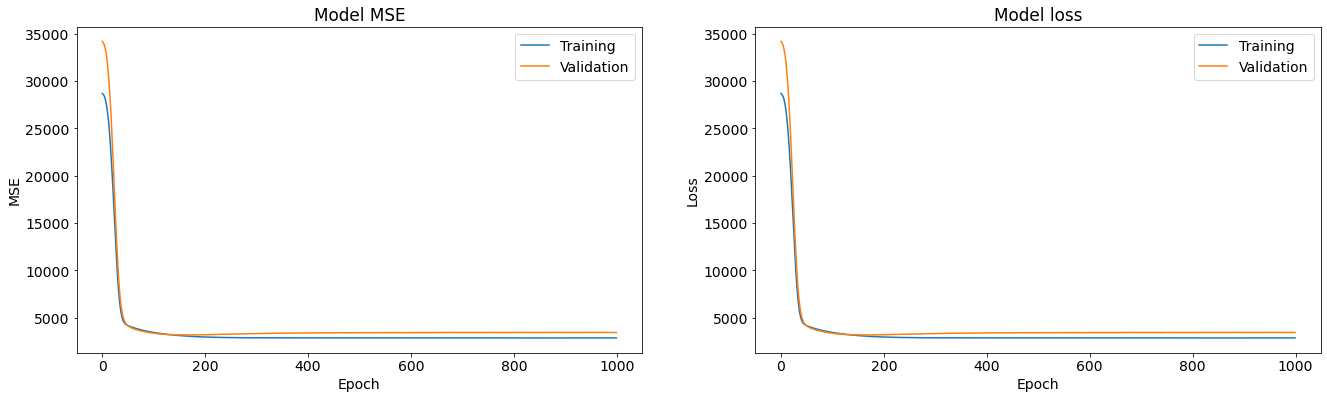

In [117]:
# insert code here

fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [118]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, preds)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
adjusted_r2

0.4588661001154577

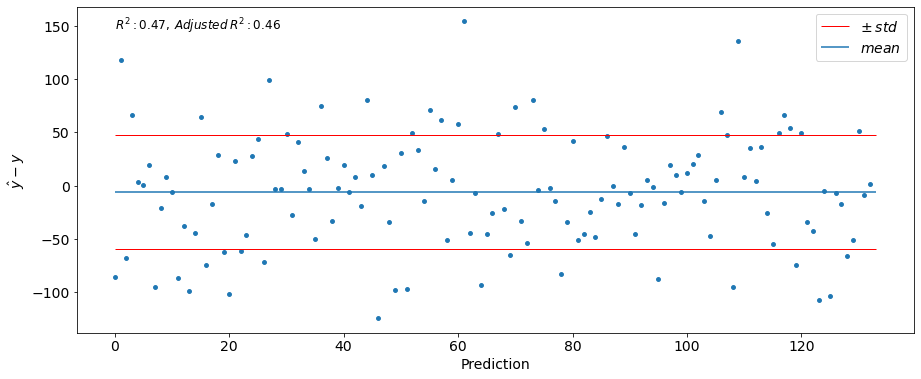

In [119]:
difference = preds.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(preds)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



